<a href="https://colab.research.google.com/github/Patrick-Moe/Repository-1/blob/Titanic-Dataset/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data analysis
import numpy as np
import pandas as pd
import random as rnd

#visualizatoin
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import ensemble, svm, tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score



In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
uploaded1 = files.upload()

Saving train.csv to train (1).csv


In [ ]:
test = pd.read_csv(io.BytesIO((uploaded['test.csv'])))

In [ ]:
train = pd.read_csv(io.BytesIO((uploaded1['train.csv'])))

In [ ]:
print(train.head(5))
print(test.columns)  #Checking what we got

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

In [ ]:
train.info()
print('_'*40)
test.info()
#we see that the training set has a total of 891 people while the test set has a total of 418 people.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(test.shape)

(418, 11)


In [ ]:
print(train.shape)

(891, 12)


In [ ]:
train.isnull().sum()
#We arent going to be using cabin, or embarked right now, so we dont have to clean that parts up.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()
#Similar disparities in the test dataset.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace = True)

print(train.isnull().sum())
print('-'*40)
print(test.isnull().sum())
#We cleaned up the age disparities

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#We see that people with a pclass of 1 had a higher survival rate then those with a p class of 3

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#we see that being a man has a significant death rate
#We see that being a woman had a significant survival rate

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#Those who had a single sibling or spouse on the ship had a higher survival rate. Those with 5 or 8 did not survive.

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#Theres a median survival rate for those in the center of the Parch
#Parch stands for number of parents/children aboard

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#This is useless. Lets sort by children

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [ ]:
child = train.loc[train['Age']<= 18.0]['Survived']
rate_kid=sum(child)/len(child)
print('% of children who survived:', rate_kid)
#Here we see that being a kid and surviving with the training set was a 50/50 shot of survival

% of children who survived: 0.5035971223021583


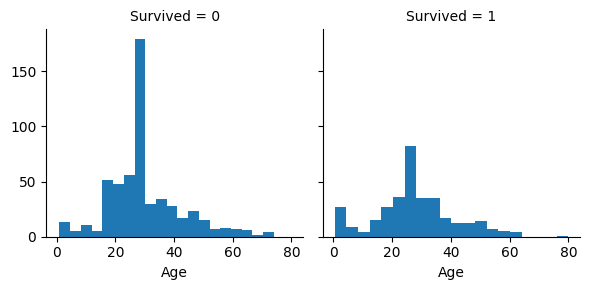

In [ ]:
graph = sns.FacetGrid(train, col = 'Survived')
graph.map(plt.hist,'Age', bins = 20)
#We can see that theres a spike in death towards those in the young adult area
# as well as the survival of a large amount of youth
#The spike in the middle is the filled average

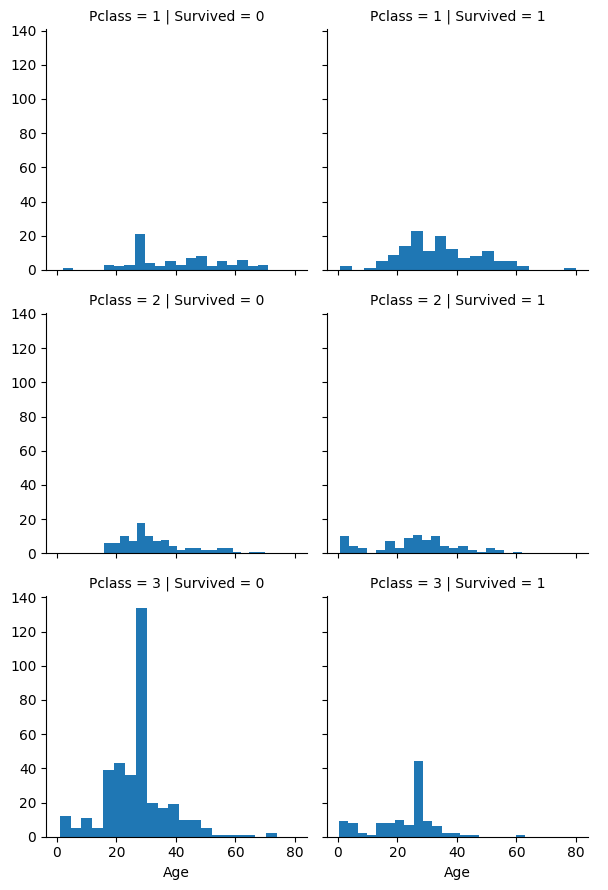

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row = 'Pclass')
grid.map(plt.hist, 'Age', bins = 20)
grid.add_legend()
  #We can see that there is a disproportionate amount of survival for those who were in first class.
  #We can also see there was a large amount of death for those in the lower classes
  #We can see that p class 3 had a larger death rate, with unaged people being there.

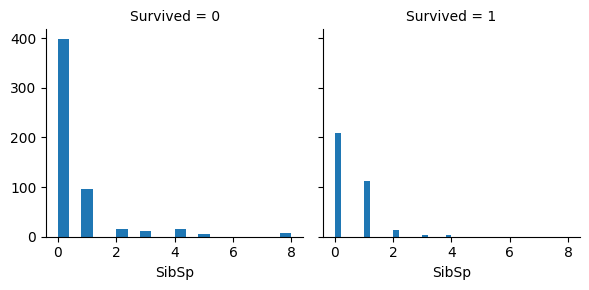

In [ ]:
graph = sns.FacetGrid(train, col = 'Survived')
graph.map(plt.hist,'SibSp', bins = 20)
#From here we can see that none of the passengers with greater then 4 siblings survived

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


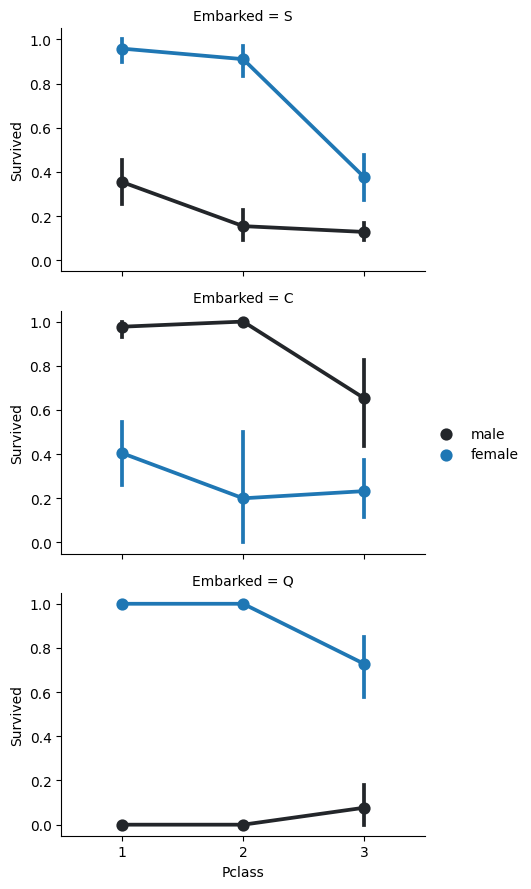

In [ ]:
sex = sns.FacetGrid(train, row = 'Embarked', aspect = 1.5)
sex.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
sex.add_legend()
#Embarked C is for Cherbourg, Q is for Queenstown, and S is for Southampton

In [ ]:
drop_column = ['Cabin', 'Ticket']
train.drop(drop_column, axis = 1, inplace = True)
#Getting rid of any un-necessary variables
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
test.drop(drop_column, axis = 1, inplace = True)
#Getting rid of the un-necessary variables.
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [ ]:
Fusion = [train, test]

In [ ]:
for data in Fusion:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])
#within the extract, the string ' ' matches a space character
#The part (A-Za-z]+) matches one or more consecutive alphabetic characters. both upper and lower case
#The \. matches a period character, such as Mr. or Mrs.
#This code is used to extract titles from names and analyze

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


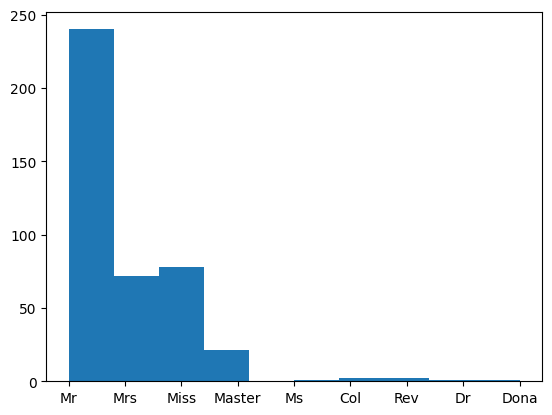

In [ ]:
plt.hist(data['Title'])
plt.show()

In [ ]:
for data in Fusion:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#From here, we create a column called title to match the data set above and categorize them

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in Fusion:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)

train.head()
#We add the title into the data set, allowing us to remove the name column in favor of Title

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [ ]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
Fusion = [train, test]
train.shape, test.shape
#At this point, we no longer need name or passenger ID

((891, 9), (418, 9))

In [ ]:
for data in Fusion:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()
#From here on out, we are able to change sex into a feature with 1's and 0's

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


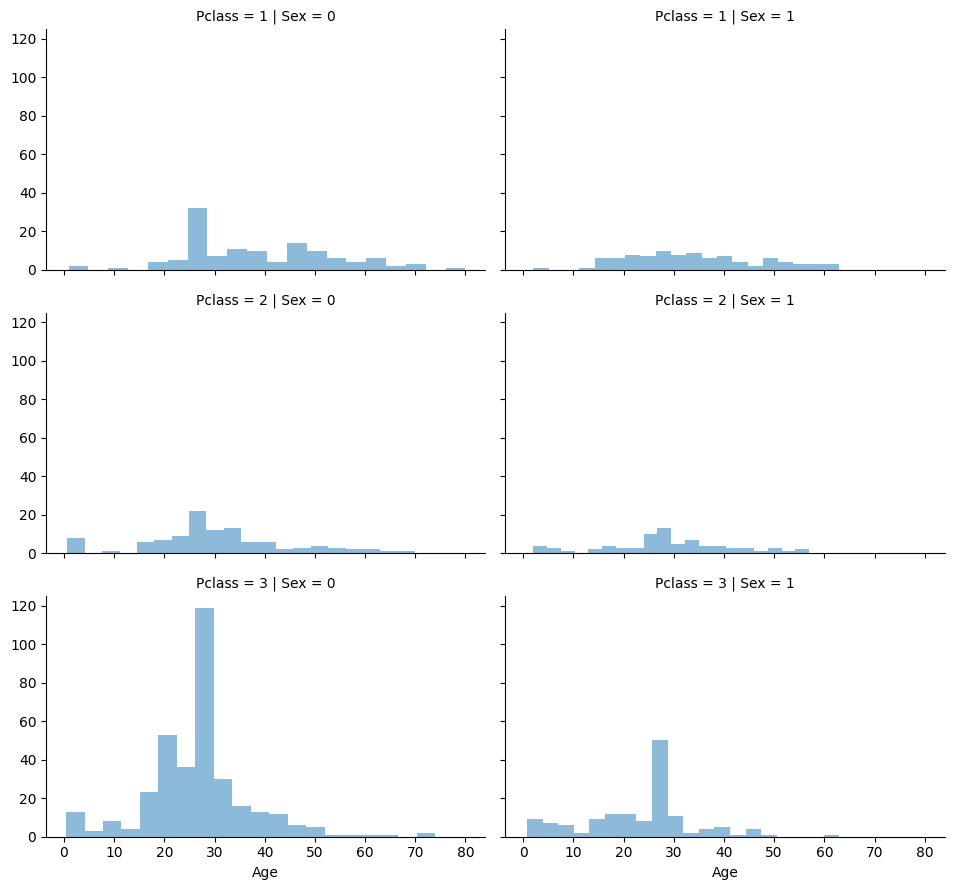

In [ ]:
gender = sns.FacetGrid(train, row='Pclass', col='Sex', aspect=1.6)
gender.map(plt.hist, 'Age', alpha=.5, bins=20)
gender.add_legend()
#We can see that men had a higher P class on average them women.
#We can infer that there were slightly more rich younger men on the ship.

In [ ]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
#We want to create a generalized age group of 5 groups. Youth, young adult, adult, older adult, and senior

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


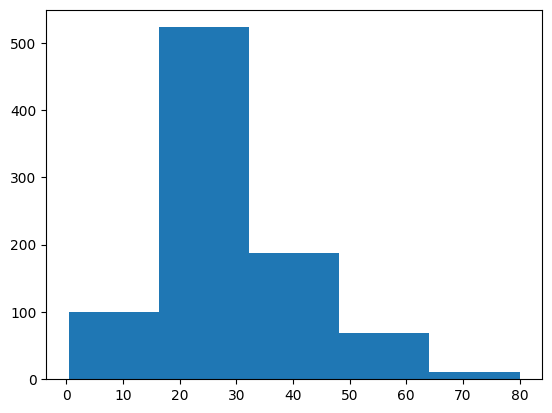

In [ ]:
plt.hist(train['Age'], bins = 5)
plt.show()
#Seeing where to split the age category on

In [ ]:
for data in Fusion:
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[(data['Age'] > 64) & (data['Age'] <= 84), 'Age'] = 4
train.head()
#We now have the age's changed to workable values that we can work with.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [ ]:
train['Age'] = train['Age'].astype(int)

In [ ]:
train['Age'].unique()
#<Make suire that our age data set is in int values.

array([1, 2, 3, 0, 4])

In [ ]:
for data in Fusion:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#From here, we create a feature called Family size to remove the variables sibsp and parch.
#the + 1 is just for people whos family size was one. So we have no 0 values.
#but looking at the data given, we see that people with a family size of 1 had 55% survival rate.
#thats more interesting then the total family sizes as a whole, due to it being single people vs not single people..

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
for data in Fusion:
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
#we can see from this that families had a higher survival rate, but single people still survived.

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,"(16.336, 32.252]",2,0
1,1,1,1,2,1,0,71.2833,C,3,"(32.252, 48.168]",2,0
2,1,3,1,1,0,0,7.9250,S,2,"(16.336, 32.252]",1,1
3,1,1,1,2,1,0,53.1000,S,3,"(32.252, 48.168]",2,0
4,0,3,0,2,0,0,8.0500,S,1,"(32.252, 48.168]",1,1


In [ ]:
train = train.drop(['Parch', 'SibSp', 'FamilySize', 'AgeBand'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
Fusion = [train, test]

train.head()
#almost there. We have to deal with the Embarked values, and the Fare values

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [ ]:
print(train.columns)
print('-'*40)
print(test.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone'],
      dtype='object')
----------------------------------------
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone'],
      dtype='object')


In [ ]:
for data in Fusion:
    data['Age*Class'] = data.Age * data.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head()
#This will further shorten out dataset. Having Age multiplied by Pclass will give us a feature variable that combines both of them
#This will allow us to decrease the total variables.

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [ ]:
common_port = train['Embarked'].dropna().mode()[0]
common_port
#find out the most common value to fill in any NA values

'S'

In [ ]:
for data in Fusion:
    data['Embarked'] = data['Embarked'].fillna(common_port)

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#most common value still did not have the most survival

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
for data in Fusion:
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()
#We have changed the C Q and S values into workable variables.

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [ ]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()
#We have dropped any of the Fare values that were na values
#Now we make a band for Fare, similar to how we did it for the age factor

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2.0,7.8292,2,1,1,6.0
1,893,3,1,2.0,7.0000,0,3,0,6.0
2,894,2,0,3.0,9.6875,2,1,1,6.0
3,895,3,0,1.0,8.6625,0,1,1,3.0
4,896,3,1,1.0,12.2875,0,3,0,3.0


In [ ]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
for data in Fusion:
    data.loc[data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare'] = 2
    data.loc[data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)



train.head(10)
#From here we have created a label for our fare that allows it to be easily managed between prices
#We have reduced the total fair prices

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,0,1,0,0,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,3,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,1,0,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,3,0,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,1,0,1,1,6,"(7.91, 14.454]"
5,0,3,0,1,1,2,1,1,3,"(7.91, 14.454]"
6,0,1,0,3,3,0,1,1,3,"(31.0, 512.329]"
7,0,3,0,0,2,0,4,0,0,"(14.454, 31.0]"
8,1,3,1,1,1,0,3,0,3,"(7.91, 14.454]"
9,1,2,1,0,2,1,3,0,0,"(14.454, 31.0]"


In [ ]:
train['Fare'].unique()

array([0, 3, 1, 2])

In [ ]:
train = train.drop(['FareBand'], axis=1)
Fusion = [train, test]

In [ ]:
test['Age'] = test['Age'].astype(int)
print(test['Age'].unique())

[2 3 1 0 4]


In [ ]:
train['Title'].unique()

array([1, 3, 2, 4, 5])

In [ ]:
print(train)
print('-'*50)
print(test)

     Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0           0       3    0    1     0         0      1        0          3
1           1       1    1    2     3         1      3        0          2
2           1       3    1    1     1         0      2        1          3
3           1       1    1    2     3         0      3        0          2
4           0       3    0    2     1         0      1        1          6
..        ...     ...  ...  ...   ...       ...    ...      ...        ...
886         0       2    0    1     1         0      5        1          2
887         1       1    1    1     2         0      2        1          1
888         0       3    1    1     2         0      2        0          3
889         1       1    0    1     2         1      1        1          1
890         0       3    0    1     0         2      1        1          3

[891 rows x 9 columns]
--------------------------------------------------
     PassengerId  Pclass 

In [ ]:
test['Age*Class']=test['Age*Class'].astype('int')
print(test.info())
#All our data is Dtype int!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   Fare         418 non-null    int64
 5   Embarked     418 non-null    int64
 6   Title        418 non-null    int64
 7   IsAlone      418 non-null    int64
 8   Age*Class    418 non-null    int64
dtypes: int64(9)
memory usage: 29.5 KB
None


**FINALLY. We are done with our data cleaning. All of our data is workable, all NA values are dropped and its all clean and beautiful. Now we can get to work.**

In [ ]:
X_train=train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_log = round(lr.score(X_train, y_train) * 100, 2)
acc_log
#The accuracy of logistic regression on the Training data set is 80.58, which is pretty good.

80.58

In [ ]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)
#We create a new data set called coeff_df, delete the axis and createa a new axis called Feature
#We then add a correlation column that is the correlation of the logistic regression to the accuracy of the dataset
#we see that Sex, and title have a higher correlation to the dataset
#We also can see that Age*class has a higher correlation then age, or Pclass individually
#However, the difference is still in the negative.

,Feature,Correlation
1,Sex,2.205691
5,Title,0.403532
4,Embarked,0.270470
6,IsAlone,0.135805
3,Fare,-0.084340
7,Age*Class,-0.113950
2,Age,-0.275890
0,Pclass,-1.058619


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn
#Thats a good score, better then the logistic regression, but is it the best?

81.26

In [ ]:

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameter value and corresponding score
print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])
print("Best score:", grid_search.best_score_)
#The best amount of neighbors we can have is 7, according to the best score

Best n_neighbors: 7
Best score: 0.8103508882053857


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn_best = round(knn.score(X_train, y_train) * 100, 2)
acc_knn_best
#Thats a highest score so far

84.51

In [ ]:
def process_svm_kernels(X_train, X_test, y_train):
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    accuracies = {}

    for kernel in kernels:
        svm1 = svm.SVC(kernel=kernel)
        svm1.fit(X_train, y_train)
        y_pred = svm1.predict(X_test)
        acc_svm = round(svm1.score(X_train, y_train) * 100, 2)
        print(f"Kernel: {kernel}, Accuracy: {acc_svm}")
    return accuracies

kernel_accuracies = process_svm_kernels(X_train, X_test, y_train)

for kernel, accuracy in kernel_accuracies.items():
    print(f"Kernel: {kernel}, Accuracy: {accuracy}")
#We process all the major svm kernels
#we can see that going through them, that poly is the most effecient one, but less then KNN

Kernel: linear, Accuracy: 78.68
Kernel: poly, Accuracy: 83.16
Kernel: rbf, Accuracy: 82.94
Kernel: sigmoid, Accuracy: 59.03


In [ ]:
svm_acc = 83.16

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree
#Move over KNearestNeighbors, a tree is blooming into first place

86.87

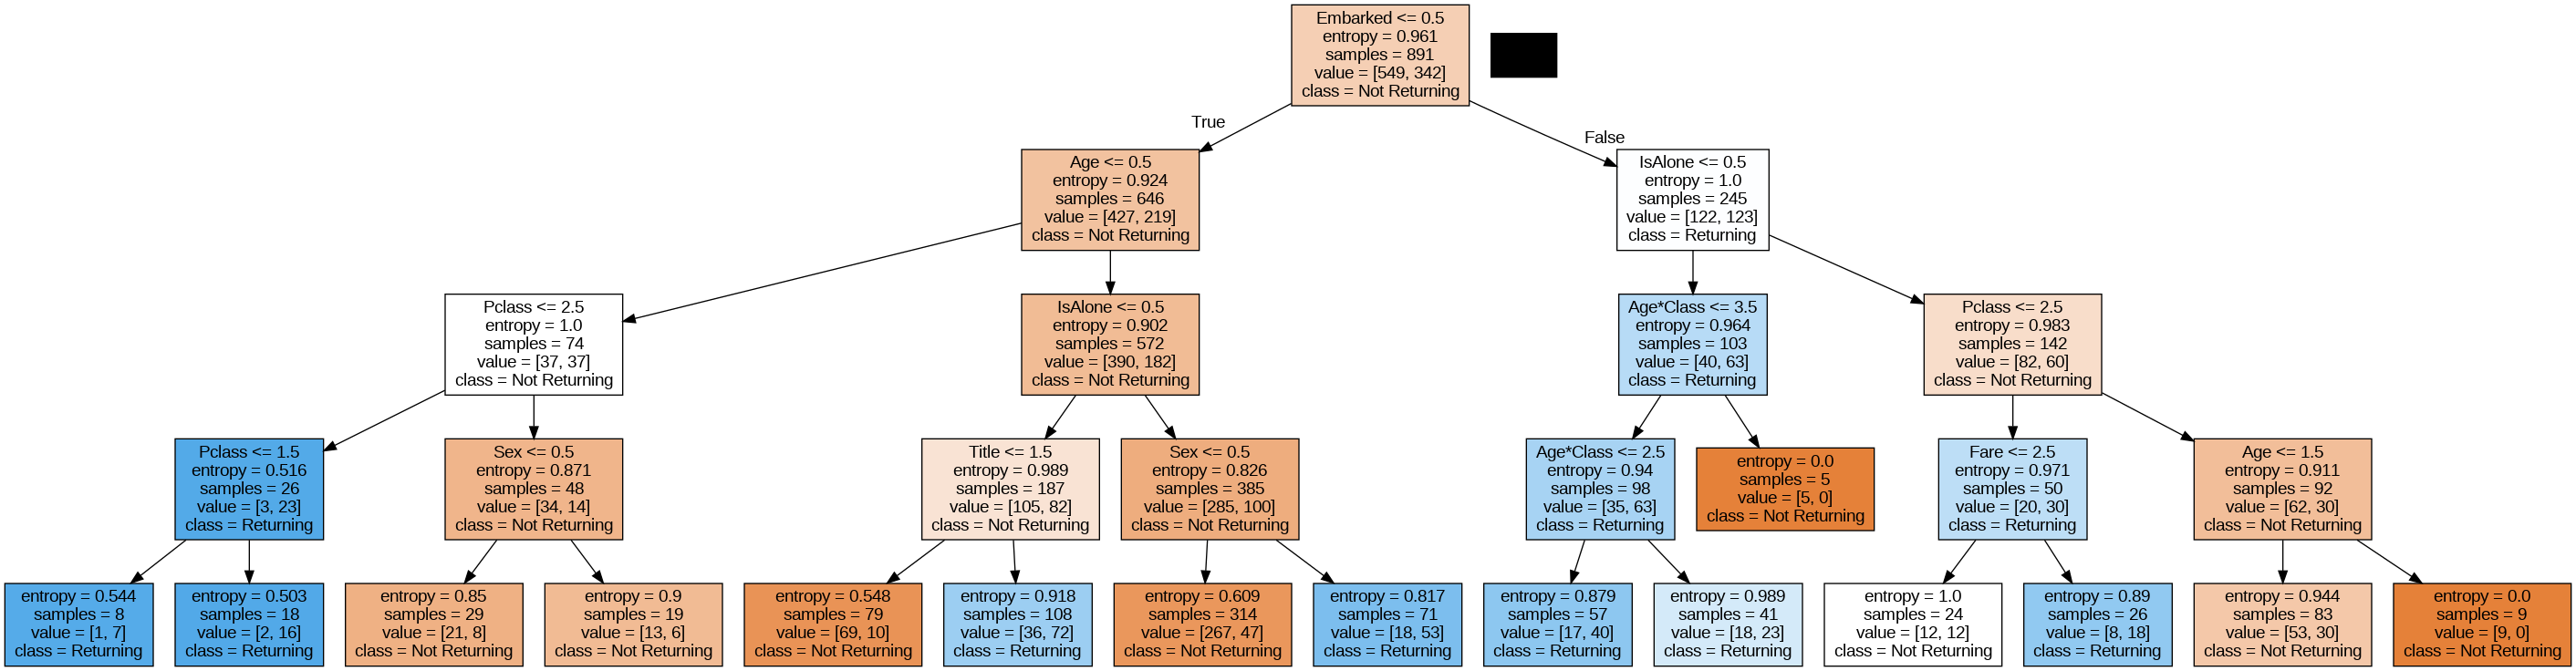

In [ ]:


# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)

# Render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#This is a map of the decision tree nodes

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest
#This, combined with the actual decision tree, are our highest model predictors

86.87

In [ ]:


param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'max_features': ['sqrt', 'log2'],    # Maximum number of features
}

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search using cross-validation on the training data
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train a Random Forest model with the best parameters using the full training data
best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                 max_features=best_params['max_features'],
                                 random_state=42)
best_rf.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

# Calculate the average accuracy across all cross-validation folds
average_accuracy = cv_scores.mean()
print("Average Accuracy:", average_accuracy)

Best Parameters: {'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.8148389931579938
Average Accuracy: 0.8148389931579938


In [ ]:
random_forest = RandomForestClassifier(n_estimators=200, max_features='sqrt', random_state = 42)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest
#This, combined with the actual decision tree, are our highest model predictors

86.87

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machines'],
    'Score': [acc_knn_best, acc_log, acc_random_forest, acc_decision_tree, svm_acc]
})
models_sorted = models.sort_values(by='Score', ascending=False).reset_index(drop=True)
print(models_sorted.to_string(index=False))

                  Model  Score
          Random Forest  86.87
          Decision Tree  86.87
                    KNN  84.51
Support Vector Machines  83.16
    Logistic Regression  80.58


As we can see, a random forest or a decision tree is the best model we can have to predict on our dataset